# Netflix - Data Exploration and Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
!gdown 1sEan2GaFkmqDXJ3yZTePjLw3H-FLERbc

Downloading...
From: https://drive.google.com/uc?id=1sEan2GaFkmqDXJ3yZTePjLw3H-FLERbc
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 185MB/s]


In [31]:
df = pd.read_csv("/content/netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Problem Statement: The goal is to give recommendation to Netflix, which type of shows or movies to produce in future and how to grow business in differnt countries. 

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#From the above output, it's clear there are few NaN values in some columns.
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.loc[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


It is clear that except release_year column all are of object data type and we colud see differnt Non-Null count for some columns so we have missing values in the data set. Also we could see for NaN values in duration column, rating column has values in min, it must be interchanged, so we need to extract that to corresponding duration column.

In [32]:
df_cleaned = df

In [33]:
#changing NaN values to custom texts
df_cleaned['director'].fillna('Director Not Known', inplace = True)
df_cleaned['cast'].fillna('Actor Not Known', inplace = True)
df_cleaned['rating'].fillna('No rating', inplace = True)
df_cleaned['country'].fillna('country Not Known', inplace = True)

In [34]:
#extracting rating column values to corresponding duration column NaN values.
df_cleaned['duration'] = df_cleaned['duration'].fillna(df_cleaned['rating'])


In [11]:
df_cleaned.loc[df_cleaned['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [35]:
#now replacing rating columns values to custom text where it contains duration values.
df_cleaned.loc[df_cleaned['rating'].str.contains('min', na = False), 'rating'] = 'Not Rated'

In [36]:
#Now the data set only contains NaN values for date_added column.
df_cleaned.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

since no imputation will be correct for date_added column and the count is only 10, so dropping date_added Nan values row.

In [37]:
#dropping 10 rows for NaN values in date_added column
df_cleaned = df_cleaned.dropna(subset=['date_added'])

In [38]:
df_cleaned.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [39]:
#Now the Data Frame df_cleaned does not have any missing values
df_cleaned.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Actor Not Known,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Known,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country Not Known,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Known,Actor Not Known,country Not Known,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Known,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8797 non-null   object
 9   duration      8797 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


converting the dtype of date_added

In [41]:
#converting the date_added to datetime format so that we can use it to extract months, years for analysis
df_cleaned["date_added"]=pd.to_datetime(df_cleaned["date_added"])

<ipython-input-41-b94985a5095e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["date_added"]=pd.to_datetime(df_cleaned["date_added"])


In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


In [43]:
df_cleaned.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Actor Not Known,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Known,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country Not Known,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Known,Actor Not Known,country Not Known,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Known,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
#we have total 6131 Movies in the dataset.
df_cleaned.loc[df_cleaned["type"] == 'Movie']["title"].count()

6131

In [45]:
#we have total 2666 TV series in our dataset. It is clear that the dataset have signifiantly more Movies.
df_cleaned.loc[df_cleaned["type"] == 'TV Show']["title"].count()

2666

In [46]:
#removed the units min and seasons to calculate aggrigate values
df_cleaned['duration'] = df_cleaned['duration'].str.replace('\s.*','')

<ipython-input-46-c3c768de3399>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cleaned['duration'] = df_cleaned['duration'].str.replace('\s.*','')
<ipython-input-46-c3c768de3399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['duration'] = df_cleaned['duration'].str.replace('\s.*','')


In [47]:
#changing the dtype of duration column to int
df_cleaned['duration'] = df_cleaned['duration'].astype('int')

<ipython-input-47-1566bc4f2d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['duration'] = df_cleaned['duration'].astype('int')


In [48]:
df_cleaned.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Actor Not Known,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Known,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country Not Known,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Known,Actor Not Known,country Not Known,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Known,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",country Not Known,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",country Not Known,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [49]:
#mean value for number of seasons per TV SHows
df_cleaned.loc[df_cleaned["type"] == 'TV Show']["duration"].mean().round(2)

1.75

In [50]:
#mean value for duration in min for Movies
df_cleaned.loc[df_cleaned["type"] == 'Movie']["duration"].mean().round(2)

99.56

Also need to unnest the data in columns like cast, Director, Country, listed_in.

In [54]:
#unsetting cast column
cast_list = df_cleaned['cast'].apply(lambda x: str(x).split(',')).tolist()
df_all_cast = pd.DataFrame(cast_list, index=df_cleaned['show_id'])
df_all_cast= df_all_cast.stack().reset_index()
df_all_cast.drop(columns={'level_1'}, inplace = True)
df_all_cast.rename(columns={0:'actors'}, inplace = True)
df_all_cast.head(5)

,show_id,actors
0,s1,Actor Not Known
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba


In [52]:
#unsetting director column
director_list = df_cleaned['director'].apply(lambda x: str(x).split(',')).tolist()
df_all_director = pd.DataFrame(director_list, index=df_cleaned['show_id'])
df_all_director= df_all_director.stack().reset_index()
df_all_director.drop(columns={'level_1'}, inplace = True)
df_all_director.rename(columns={0:'directors'}, inplace = True)
df_all_director.head(10)

,show_id,directors
0,s1,Kirsten Johnson
1,s2,Director Not Known
2,s3,Julien Leclercq
3,s4,Director Not Known
4,s5,Director Not Known
5,s6,Mike Flanagan
6,s7,Robert Cullen
7,s7,José Luis Ucha
8,s8,Haile Gerima
9,s9,Andy Devonshire


In [53]:
#unsetting country column
country_list = df_cleaned['country'].apply(lambda x: str(x).split(',')).tolist()
df_all_countries = pd.DataFrame(country_list, index=df_cleaned['show_id'])
df_all_countries= df_all_countries.stack().reset_index()
df_all_countries.drop(columns={'level_1'}, inplace = True)
df_all_countries.rename(columns={0:'countries'}, inplace = True)
df_all_countries.head(15)

,show_id,countries
0,s1,United States
1,s2,South Africa
2,s3,country Not Known
3,s4,country Not Known
4,s5,India
5,s6,country Not Known
6,s7,country Not Known
7,s8,United States
8,s8,Ghana
9,s8,Burkina Faso


In [55]:
#unsetting listed_in column
gener_list = df_cleaned['listed_in'].apply(lambda x: str(x).split(',')).tolist()
df_all_gener = pd.DataFrame(gener_list, index=df_cleaned['show_id'])
df_all_gener= df_all_gener.stack().reset_index()
df_all_gener.drop(columns={'level_1'}, inplace = True)
df_all_gener.rename(columns={0:'geners'}, inplace = True)
df_all_gener.head(10)

,show_id,geners
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
5,s3,International TV Shows
6,s3,TV Action & Adventure
7,s4,Docuseries
8,s4,Reality TV
9,s5,International TV Shows


In [56]:
#Now merging actors, directors, countries and geners
df_cast_director = df_all_cast.merge(df_all_director, on = 'show_id', how = 'inner')
df_cast_director_country = df_cast_director.merge(df_all_countries, on = 'show_id', how = 'inner')
df_cast_director_country_gener = df_cast_director_country.merge(df_all_gener, on = 'show_id', how = 'inner')
df_cast_director_country_gener

,show_id,actors,directors,countries,geners
0,s1,Actor Not Known,Kirsten Johnson,United States,Documentaries
1,s2,Ama Qamata,Director Not Known,South Africa,International TV Shows
2,s2,Ama Qamata,Director Not Known,South Africa,TV Dramas
3,s2,Ama Qamata,Director Not Known,South Africa,TV Mysteries
4,s2,Khosi Ngema,Director Not Known,South Africa,International TV Shows
...,...,...,...,...,...
201902,s8807,Anita Shabdish,Mozez Singh,India,International Movies
201903,s8807,Anita Shabdish,Mozez Singh,India,Music & Musicals
201904,s8807,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201905,s8807,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [57]:
#Now finally merging the reseted data frame with the df_cleaned
df_final_merge = df_cast_director_country_gener.merge(df_cleaned[['show_id','title','type','date_added','release_year','rating','duration']], on=['show_id'], how = 'left' )
df_final_merge

,show_id,actors,directors,countries,geners,title,type,date_added,release_year,rating,duration
0,s1,Actor Not Known,Kirsten Johnson,United States,Documentaries,Dick Johnson Is Dead,Movie,2021-09-25,2020,PG-13,90
1,s2,Ama Qamata,Director Not Known,South Africa,International TV Shows,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
2,s2,Ama Qamata,Director Not Known,South Africa,TV Dramas,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
3,s2,Ama Qamata,Director Not Known,South Africa,TV Mysteries,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
4,s2,Khosi Ngema,Director Not Known,South Africa,International TV Shows,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
...,...,...,...,...,...,...,...,...,...,...,...
201902,s8807,Anita Shabdish,Mozez Singh,India,International Movies,Zubaan,Movie,2019-03-02,2015,TV-14,111
201903,s8807,Anita Shabdish,Mozez Singh,India,Music & Musicals,Zubaan,Movie,2019-03-02,2015,TV-14,111
201904,s8807,Chittaranjan Tripathy,Mozez Singh,India,Dramas,Zubaan,Movie,2019-03-02,2015,TV-14,111
201905,s8807,Chittaranjan Tripathy,Mozez Singh,India,International Movies,Zubaan,Movie,2019-03-02,2015,TV-14,111


In [58]:
df_final_merge.isna().sum()

show_id         0
actors          0
directors       0
countries       0
geners          0
title           0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [59]:
#unique tittles
df_final_merge["title"].nunique()

8797

In [60]:
##unique actors
df_final_merge["actors"].nunique()

39261

In [63]:
#top geners
df_final_merge["geners"].value_counts().head(3)

 International Movies    27141
Dramas                   19657
Comedies                 13894
Name: geners, dtype: int64

From the above out put, we can say International Movies, Dramas and Comedies are the most frequent geners across world irrespective of Movies and TV Shows.

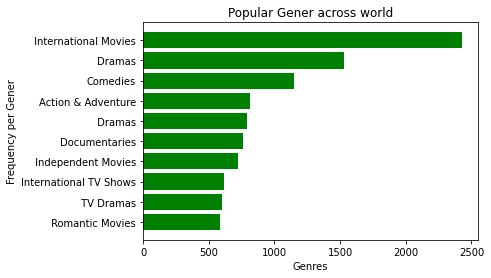

In [66]:
#Popular Gener across world
df_countries = df_final_merge[df_final_merge["countries"] != "country Not Known"]
geners_across_countries = df_countries.groupby(["geners"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(geners_across_countries['geners'], geners_across_countries['title'], color = 'green')
plt.xlabel("Genres")
plt.ylabel("Frequency per Gener")
plt.title("Popular Gener across world")
plt.show()

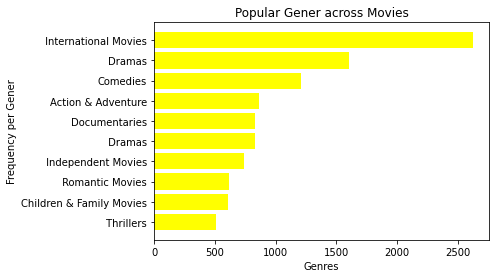

In [67]:
#Popular Gener across Movies
df_movies = df_final_merge[df_final_merge["type"]== 'Movie']
geners_df_movies = df_movies.groupby(["geners"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(geners_df_movies['geners'], geners_df_movies['title'], color = 'yellow')
plt.xlabel("Genres")
plt.ylabel("Frequency per Gener")
plt.title("Popular Gener across Movies")
plt.show()

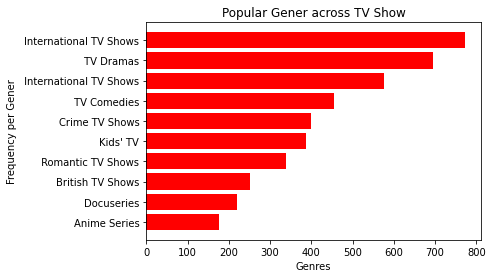

In [68]:
#Popular Gener across TV Show
df_TV_series = df_final_merge[df_final_merge["type"]== 'TV Show']
geners_df_TV_series = df_TV_series.groupby(["geners"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(geners_df_TV_series['geners'], geners_df_TV_series['title'], color = 'red')
plt.xlabel("Genres")
plt.ylabel("Frequency per Gener")
plt.title("Popular Gener across TV Show")
plt.show()

From the above 3 plots, we can infer that International Movies, Dramas and Comedies are the top geners.

In [69]:
#top rating groups
df_final_merge["rating"].value_counts().head(3)

TV-MA    73883
TV-14    43885
R        25860
Name: rating, dtype: int64

From above output we can infer that TV-MA and TV-14 and R are the top target audiance across countries.

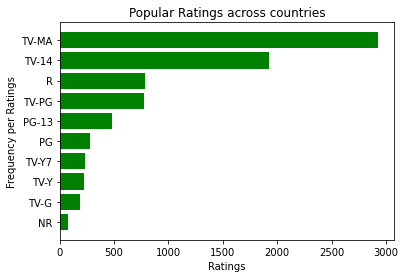

In [71]:
#Popular Ratings across countries
df_countries = df_final_merge[df_final_merge["countries"] != "country Not Known"]
rating_across_countries = df_countries.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(rating_across_countries['rating'], rating_across_countries['title'], color = 'green')
plt.xlabel("Ratings")
plt.ylabel("Frequency per Ratings")
plt.title("Popular Ratings across countries")
plt.show()


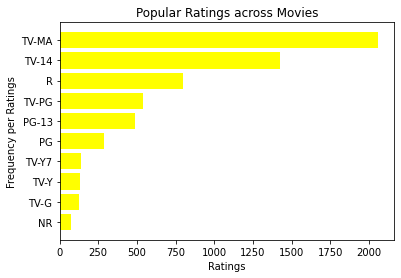

In [72]:
#Popular Ratings across Movies
df_movies = df_final_merge[df_final_merge["type"]== 'Movie']
rating_df_movies = df_movies.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(rating_df_movies['rating'], rating_df_movies['title'], color = 'yellow')
plt.xlabel("Ratings")
plt.ylabel("Frequency per Ratings")
plt.title("Popular Ratings across Movies")
plt.show()

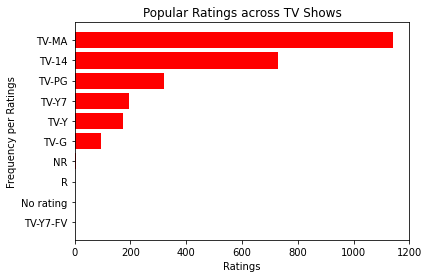

In [73]:
#Popular Ratings across TV Shows
df_TV_series = df_final_merge[df_final_merge["type"]== 'TV Show']
rating_df_TV_series = df_TV_series.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(rating_df_TV_series['rating'], rating_df_TV_series['title'], color = 'red')
plt.xlabel("Ratings")
plt.ylabel("Frequency per Ratings")
plt.title("Popular Ratings across TV Shows")
plt.show()

From the above three plots, it can be concluded that TV-MA and TV-14 are the top target audiance across countries and across Movies and TV shows

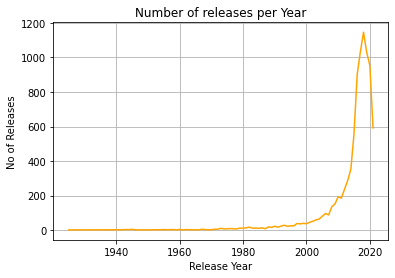

In [78]:
#Frequency of releases per year
df_release_per_year = df_final_merge.groupby("release_year").agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_per_year,
x="release_year",
y="title", color="orange")
plt.xlabel("Release Year")
plt.ylabel("No of Releases")
plt.title("Number of releases per Year")
plt.grid()
plt.show()

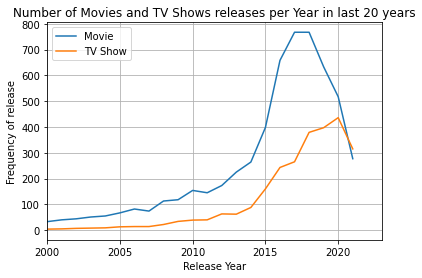

In [86]:
#Frequency of TV Shows and Movies releases per Year in last 20 years
movie_release_per_year = df_final_merge[df_final_merge["type"] == "Movie"].groupby("release_year").agg({"title":"nunique"}).reset_index()
sns.lineplot(data=movie_release_per_year,
x="release_year",
y="title")
plt.xlim(left=2000,right=2023)
TV_show_release_per_year = df_final_merge[df_final_merge["type"] == "TV Show"].groupby("release_year").agg({"title":"nunique"}).reset_index()
sns.lineplot(data=TV_show_release_per_year,
x="release_year",
y="title")
plt.xlim(left=2000,right=2023)
plt.xlabel("Release Year")
plt.ylabel("Frequency of release")
plt.title("Number of Movies and TV Shows releases per Year in last 20 years")
plt.legend(["Movie","TV Show"])
plt.grid()
plt.show()

From the above three plots, it can be concluded that the number of releases increases drastically from year 2000 but from 2019 it started declining across Movies and TV Series. Also we can see Netflix has more focus on Movies than TV Shows.

<ipython-input-90-e9b0742e6b85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month_added'] = pd.DatetimeIndex(tv_shows['date_added']).month


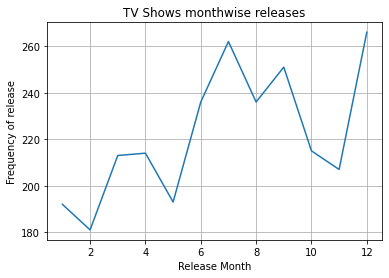

In [90]:
#TV Shows monthwise releases 
tv_shows = df_final_merge[df_final_merge['type'] == "TV Show"]
tv_shows['month_added'] = pd.DatetimeIndex(tv_shows['date_added']).month
df_month = tv_shows.groupby(["month_added"]).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month,
x="month_added",
y="title")
plt.xlabel("Release Month")
plt.ylabel("Frequency of release")
plt.title("TV Shows monthwise releases")
plt.grid()
plt.show()

From the above plot, it can be infer that TV shows are added mostly on July and December Months

<ipython-input-91-9d0b768ebcd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['month_added'] = pd.DatetimeIndex(df_movies['date_added']).month


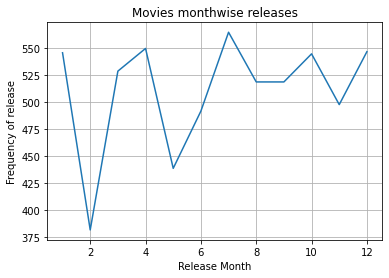

In [91]:
#Movies monthwise releases 
df_movies = df_final_merge[df_final_merge['type'] == "Movie"]
df_movies['month_added'] = pd.DatetimeIndex(df_movies['date_added']).month
df_month = df_movies.groupby(["month_added"]).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month,
x="month_added",
y="title")
plt.xlabel("Release Month")
plt.ylabel("Frequency of release")
plt.title("Movies monthwise releases")
plt.grid()
plt.show()

From the above plot, it can be infer that Movies are added mostly on July.

In [98]:
df_movies['year_added'] = pd.DatetimeIndex(df_movies['date_added']).year
df_movies['year_diff'] = df_movies["year_added"] - df_movies["release_year"]
df_movies['year_diff'].mean().round(2)

<ipython-input-98-556203246e86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['year_added'] = pd.DatetimeIndex(df_movies['date_added']).year
<ipython-input-98-556203246e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['year_diff'] = df_movies["year_added"] - df_movies["release_year"]


6.83

In [99]:
tv_shows['year_added'] = pd.DatetimeIndex(tv_shows['date_added']).year
tv_shows['year_diff'] = tv_shows["year_added"] - tv_shows["release_year"]
tv_shows['year_diff'].mean().round(2)

<ipython-input-99-8b2cb49fc67b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['year_added'] = pd.DatetimeIndex(tv_shows['date_added']).year
<ipython-input-99-8b2cb49fc67b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['year_diff'] = tv_shows["year_added"] - tv_shows["release_year"]


2.1

From the above value of mean difference in release year and the year it is added to Netflix it is clear that the differnce is high (6.83) in case of movies but it is low (2.1) in case of TV shows

In [201]:
df_final_merge["directors"].value_counts()

Director Not Known     50485
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: directors, Length: 5121, dtype: int64

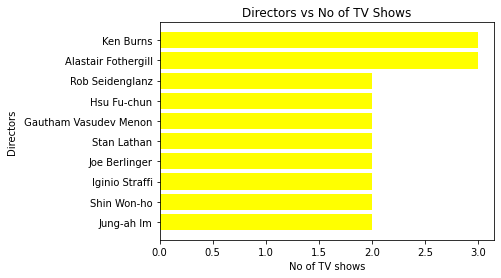

In [103]:
#top directors in TV shows
df_director_tv_show = tv_shows[tv_shows["directors"] != "Director Not Known"]
df_director_tv_show_unique = df_director_tv_show.groupby(["directors"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(df_director_tv_show_unique['directors'], df_director_tv_show_unique['title'], color = 'yellow')
plt.xlabel("No of TV shows")
plt.ylabel("Directors")
plt.title("Directors vs No of TV Shows")
plt.show()

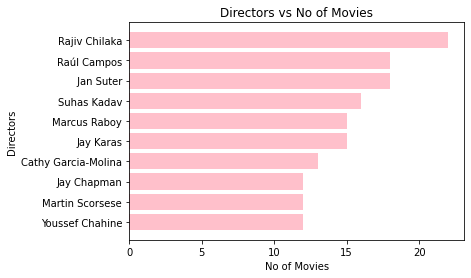

In [104]:
#top directors in Movies 
df_director_movies = df_movies[df_movies["directors"] != "Director Not Known"]
df_director_movies_unique = df_director_movies.groupby(["directors"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(df_director_movies_unique['directors'], df_director_movies_unique['title'], color = 'pink')
plt.xlabel("No of Movies")
plt.ylabel("Directors")
plt.title("Directors vs No of Movies")
plt.show()

From the above two plots Ken Burns and Alastair Forthergill are the top directors in TV shows, Rajiv Chilaka and Raul Campos are the top directors in Movies.

In [105]:
df_final_merge["actors"].value_counts()

Actor Not Known      2149
 Alfred Molina        160
 Salma Hayek          130
 Frank Langella       128
 John Rhys-Davies     125
                     ... 
Janna Levin             1
 Bumper Robinson        1
Doug Averill            1
Joe Morton              1
Steve Leonard           1
Name: actors, Length: 39261, dtype: int64

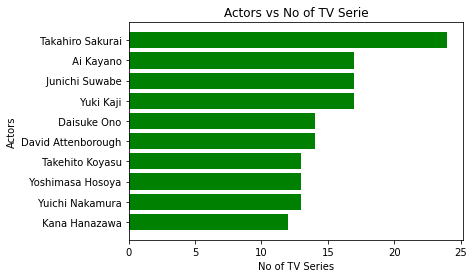

In [108]:
#top actors in TV Series
df_actors_tv_show = tv_shows[tv_shows["actors"] != "Actor Not Known"]
df_actors_tv_show_unique = df_actors_tv_show.groupby(["actors"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(df_actors_tv_show_unique['actors'], df_actors_tv_show_unique['title'], color = 'green')
plt.xlabel("No of TV Series")
plt.ylabel("Actors")
plt.title("Actors vs No of TV Serie")
plt.show()

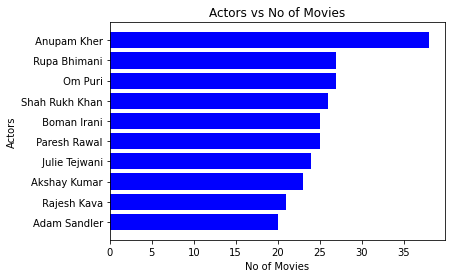

In [107]:
#top actors in Movies 
df_actor_movies = df_movies[df_movies["actors"] != "Actor Not Known"]
df_actor_movies_unique = df_actor_movies.groupby(["actors"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=True).tail(10)
plt.barh(df_actor_movies_unique['actors'], df_actor_movies_unique['title'], color = 'blue')
plt.xlabel("No of Movies")
plt.ylabel("Actors")
plt.title("Actors vs No of Movies")
plt.show()

From the above two plots Takahiro Sakurai and Al Kayano are the top actors in TV shows, Anupam Kher, Rupa Bhimani and Om Puri are the top actors in Movies.

In [203]:
df_final_merge

,show_id,actors,directors,countries,geners,title,type,date_added,release_year,rating,duration
0,s1,Actor Not Known,Kirsten Johnson,United States,Documentaries,Dick Johnson Is Dead,Movie,2021-09-25,2020,PG-13,90
1,s2,Ama Qamata,Director Not Known,South Africa,International TV Shows,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
2,s2,Ama Qamata,Director Not Known,South Africa,TV Dramas,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
3,s2,Ama Qamata,Director Not Known,South Africa,TV Mysteries,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
4,s2,Khosi Ngema,Director Not Known,South Africa,International TV Shows,Blood & Water,TV Show,2021-09-24,2021,TV-MA,2
...,...,...,...,...,...,...,...,...,...,...,...
201902,s8807,Anita Shabdish,Mozez Singh,India,International Movies,Zubaan,Movie,2019-03-02,2015,TV-14,111
201903,s8807,Anita Shabdish,Mozez Singh,India,Music & Musicals,Zubaan,Movie,2019-03-02,2015,TV-14,111
201904,s8807,Chittaranjan Tripathy,Mozez Singh,India,Dramas,Zubaan,Movie,2019-03-02,2015,TV-14,111
201905,s8807,Chittaranjan Tripathy,Mozez Singh,India,International Movies,Zubaan,Movie,2019-03-02,2015,TV-14,111


In [121]:
#Top Actor Director combinations
df_director = df_final_merge[df_final_merge["directors"] != "Director Not Known"]
df_actors = df_final_merge[df_final_merge["actors"] != "Actor Not Known"]
top_3_actors=df_actors["actors"].value_counts().index[:10]
top_3_directors=df_director["directors"].value_counts().index[:10]
top_3_data=df_final_merge.loc[(df_final_merge["actors"].isin(top_3_actors)) & (df_final_merge["directors"].isin(top_3_directors))]
data = top_3_data[["actors", "directors"]]
data.drop_duplicates(keep="first")

,actors,directors
5080,Anupam Kher,David Dhawan
160643,John Rhys-Davies,Steven Spielberg
160679,Alfred Molina,Steven Spielberg
181061,Liam Neeson,Steven Spielberg


Above mentioned Actors and directors combinations are popular.

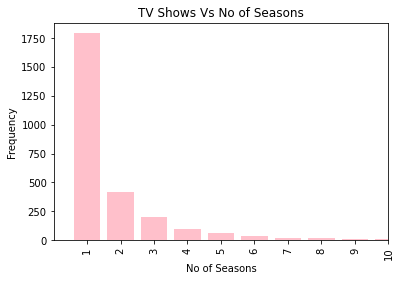

In [112]:
#Number of seasons per TV shows
df_TV_show = df_final_merge[df_final_merge["type"]== 'TV Show']
df_TV_show_unique = df_TV_show.groupby(["duration"]).agg({"title":"nunique"}).reset_index()
plt.bar(df_TV_show_unique['duration'], df_TV_show_unique['title'], color = 'pink')
plt.xticks(rotation=90)
plt.xlim(left=0,right=10)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel("No of Seasons")
plt.ylabel("Frequency")
plt.title("TV Shows Vs No of Seasons")
plt.show()

From the above plot, TV shows with 1 or 2 seasons are popular.

<ipython-input-114-4adfa373f8c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration_cat"]=pd.cut(df_movies["duration"],


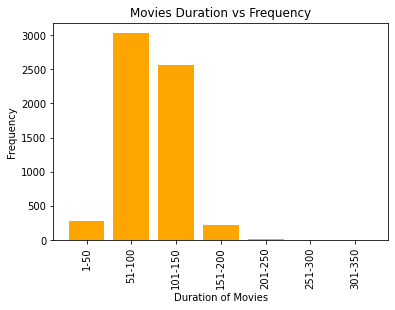

In [114]:
#conversion of duration attributes to differnt category to analyze most preffered duration movie
df_movies = df_final_merge[df_final_merge["type"] == 'Movie']
dur_point=[1,50,100,150,200,250,300,350]
dur_labels=["1-50","51-100","101-150","151-200","201-250","251-300","301-350"]
df_movies["duration_cat"]=pd.cut(df_movies["duration"],
bins=dur_point,
labels=dur_labels)
df_movies_unique = df_movies.groupby(["duration_cat"]).agg({"title":"nunique"}).reset_index()
plt.bar(df_movies_unique['duration_cat'], df_movies_unique['title'], color = 'orange')
plt.xticks(rotation=90)
plt.xlabel("Duration of Movies")
plt.ylabel("Frequency")
plt.title("Movies Duration vs Frequency")
plt.show()

From the above plot, Movies with 51 to 150 minutes are popular.

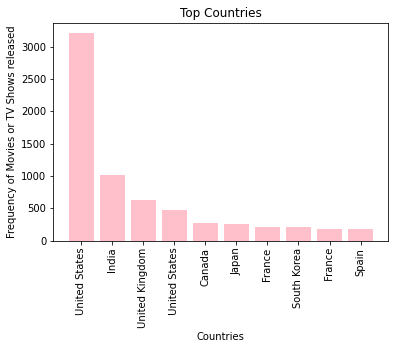

In [131]:
#Top Countries
df_countries = df_final_merge[df_final_merge["countries"] != "country Not Known"]
top_country = df_countries.groupby(["countries"]).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'], ascending=False).head(10)
plt.bar(top_country['countries'], top_country['title'], color = 'pink')
plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Frequency of Movies or TV Shows released")
plt.title("Top Countries")
plt.show()

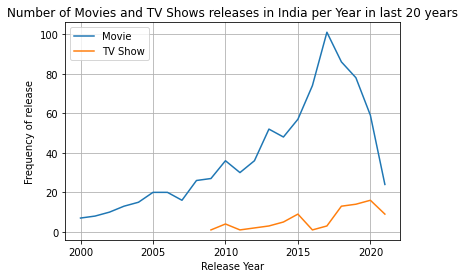

In [138]:
#Number of Movies and TV Shows releases in India per Year in last 20 years
india_countries = df_final_merge[(df_final_merge["countries"] == "India") & (df_final_merge["release_year"] >= 2000)]
movie_release_per_year = india_countries[india_countries["type"] == "Movie"].groupby("release_year").agg({"title":"nunique"}).reset_index()
sns.lineplot(data=movie_release_per_year,
x="release_year",
y="title")

TV_show_release_per_year = india_countries[india_countries["type"] == "TV Show"].groupby("release_year").agg({"title":"nunique"}).reset_index()
sns.lineplot(data=TV_show_release_per_year,
x="release_year",
y="title")

plt.xlabel("Release Year")
plt.ylabel("Frequency of release")
plt.title("Number of Movies and TV Shows releases in India per Year in last 20 years")
plt.legend(["Movie","TV Show"])
plt.grid()
plt.show()

**Business Insights**


*   we can infer from the pattern we have observed that International Movies, Dramas and Comedies are the top geners across the world.
*   we can infer that TV-MA and TV-14 and R are the top target audiance across countries.
*   we can infer that the number of releases increases drastically from year 2000 but from 2019 it started declining across Movies and TV Series.
*  we can infer that Netflix has more focus on Movies than TV Shows in recent years.
*   we can infer that TV shows and Movies are added mostly on July and December Months.
*  we can infer from the pattern that the gap between the relese year and the year it is added to Netflix is high in Movies in comparisions to TV Series.
* we can infer that	(Anupam Kher,	David Dhawan), (John Rhys-Davies,	Steven Spielberg), (Alfred Molina,	Steven Spielberg) and (Liam Neeson,	Steven Spielberg) are the top actors and director combinations.
*  Most TV shows has 1 or 2 seasons and most of the movies are of 51 min to 150 min length durations.
* we can infer that Netflix has maximum contents in United States, India and United Kingdom.
* The content for India is decreaseing since 2018.



**Recommendations**


*   New Contents can be created of popular geners like International Movies, Dramas and Comedies.
*   New moviesand TV shows can be created targetting TV-MA, TV-14 and R as the top target audiance.
*  New contents can be relaesed during the month of July and December.
*  The movies can be added with a short period of time to avoid big gap between release date and the date in which it is being added to Netflix.
* For new conents, the popular actor directors combinations can be taken into consideration.
* TV shows with 1 or 2 seasons and Movies of duration 51 to 150 min length is recommened.
* The contents in India is decreasing since 2018, so more content can be added to it.

